## EP20BTECH11015 ASSIGNMENT 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy import optimize as opt
from statsmodels.tools import eval_measures as em

1.

Download the data corresponding to x, y, and σy from http://www.iith.ac.in/~shantanud/testdata.dat. 

Find the best-fit values after fitting the data to linear, quadratic, and cubic polynomials. 

Find out which
model fits the data best from frequentist model comparison as well as using
AIC and BIC. 

For frequentist model comparison, using the linear model
as the null hypothesis, find out the p value corresponding to the preferred
model. (or if the linear model is the prefered model, then compare it to
the quadratic model). 

Also show a plot overlaying the data with best
fit solutions from linear, quadratic and cubic functions with different line
styles for each of the fits.

In [2]:
testdata = np.loadtxt('testdata.dat')

def linear(x, a, b):
    return a*x + b

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d


linearfit_param = curve_fit(linear, xdata = testdata[:,0], ydata = testdata[:,1], sigma=testdata[:,2])
quadraticfit_param = curve_fit(quadratic, testdata[:,0], testdata[:,1], sigma=testdata[:,2])
cubicfit_param = curve_fit(cubic, testdata[:,0], testdata[:,1], sigma=testdata[:,2])
print('Linear fit parameters: ', linearfit_param[0])
print('Quadratic fit parameters: ', quadraticfit_param[0])
print('Cubic fit parameters: ', cubicfit_param[0])

Linear fit parameters:  [ 2.79789861 -1.11028082]
Quadratic fit parameters:  [ 0.50261293  2.38475187 -1.05578915]
Cubic fit parameters:  [-0.96724992  1.74451332  1.97184055 -1.02910462]


#### Frequentist model comparison

In [3]:
chi2_linear = np.sum(((testdata[:,1] - linear(testdata[:,0], *linearfit_param[0]))/testdata[:,2])**2)
chi2_quadratic = np.sum(((testdata[:,1] - quadratic(testdata[:,0], *quadraticfit_param[0]))/testdata[:,2])**2)
chi2_cubic = np.sum(((testdata[:,1] - cubic(testdata[:,0], *cubicfit_param[0]))/testdata[:,2])**2)


def chi2_gof(x, y, yerr, fit_func, *fit_func_args):
    return np.sum(((y - fit_func(x, *fit_func_args))/yerr)**2)


#Linear fit is considered as NULL hypothesis
delta_chi2_quadratic = chi2_linear - chi2_quadratic
delta_chi2_cubic = chi2_linear - chi2_cubic

p_quadratic = 1 - st.chi2.cdf(delta_chi2_quadratic, 1)
p_cubic = 1 - st.chi2.cdf(delta_chi2_cubic, 2)

print('p-value for quadratic fit: ', p_quadratic)
print('p-value for cubic fit: ', p_cubic)

p-value for quadratic fit:  0.17813275695316733
p-value for cubic fit:  0.32887884419522884


The p-value of the quadratic model is less than cubic model so the cubic model may be a better fit.

#### Maximum Likelihood Estimation

In [4]:
def likelihood_estimator(func, data, *args):
    return np.product(np.exp(-0.5 * (((data[:,1] - func(data[:,0], *args))/data[:,2]) ** 2) ))

def max_likelihood(func, data, args):
    return opt.minimize(lambda x: -likelihood_estimator(func, data, *x), args, method='Nelder-Mead').x


maxlkl = [likelihood_estimator(linear,testdata, *max_likelihood(linear, testdata, linearfit_param[0])),
likelihood_estimator(quadratic, testdata, *max_likelihood(quadratic, testdata, quadraticfit_param[0])),
likelihood_estimator(cubic, testdata, *max_likelihood(cubic, testdata, cubicfit_param[0]))]

#Calculate AIC and BIC
bic = -2 * np.log(maxlkl) + np.log(len(testdata)) * np.array([2, 3, 4])

aic = -2 * np.log(maxlkl) + 2 * np.array([2, 3, 4])

aic_c = aic + 2 * np.array([2, 3, 4]) * np.array([3, 4, 5]) / (len(testdata) - np.array([2, 3, 4]) - 1)

#Linear fit is considered as NULL hypothesis
delta_aic = aic - aic[0]

delta_bic = bic - bic[0]

print('AIC for linear fit: ', aic[0])
print('BIC for linear fit: ', bic[0])
print()

print('AIC for quadratic fit: ', aic[1])
print('BIC for quadratic fit: ', bic[1])
print()

print('AIC for cubic fit: ', aic[2])
print('BIC for cubic fit: ', bic[2])


print('\nLinear fit is considered as NULL hypothesis\n')

print('Delta AIC for quadratic fit: ', delta_aic[1])
print('Delta BIC for quadratic fit: ', delta_bic[1])
print()
print('Delta AIC for cubic fit: ', delta_aic[2])
print('Delta BIC for cubic fit: ', delta_bic[2])

# print('delta AIC for quadratic fit ')

AIC for linear fit:  15.309175575502223
BIC for linear fit:  17.300640122610204

AIC for quadratic fit:  15.496041767569295
BIC for quadratic fit:  18.483238588231266

AIC for cubic fit:  17.085043873972353
BIC for cubic fit:  21.067972968188315

Linear fit is considered as NULL hypothesis

Delta AIC for quadratic fit:  0.18686619206707178
Delta BIC for quadratic fit:  1.1825984656210622

Delta AIC for cubic fit:  1.7758682984701295
Delta BIC for cubic fit:  3.7673328455781103


Delta AIC for quadratic and cubic model are in the range 0-2 which supports both models. 

Delta BIC for quadratic model is < 2 indicating no significant evidence against a quadratic fit.

Delta BIC for cubic model is >2 indicating a positive evidence against the cubic model.

So the quadratic model is preferred.

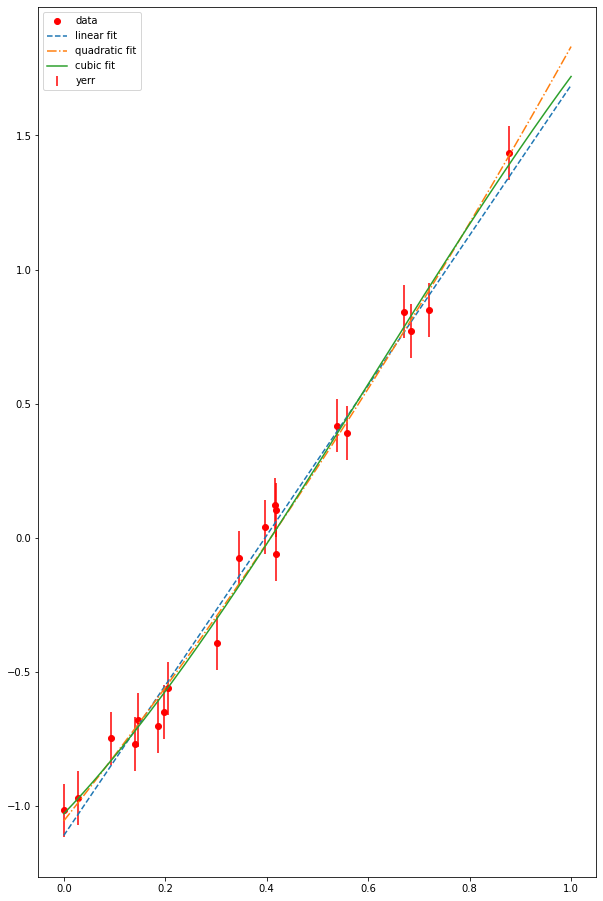

In [5]:
#Plotting the data and the fits

trange = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,16))
plt.scatter(testdata[:,0], testdata[:,1], label='data', c='r')
plt.errorbar(testdata[:,0], testdata[:,1], yerr=testdata[:,2], fmt='none', label='yerr', c='r')
plt.plot(trange, linear(trange, *linearfit_param[0]), label='linear fit', ls = '--')
plt.plot(trange, quadratic(trange, *quadraticfit_param[0]), label='quadratic fit', ls = '-.')
plt.plot(trange, cubic(trange, *cubicfit_param[0]), label='cubic fit')
plt.legend()
plt.show()

2. 
For the model comparison problem shown in class on JVDP’s blog, calculate AIC and BIC for the linear and quadratic models. 

Do these results agree with the frequentist model comparison results shown on the blog?

Also mention the qualitative significance using strength of evidence rules.

In [6]:
data = np.array([[ 0.42,  0.72,  1e-7  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])

x, y, sigma_y = data
linearfit_param = curve_fit(linear, xdata = x, ydata = y, sigma=sigma_y)
quadraticfit_param = curve_fit(quadratic, xdata = x, ydata = y, sigma=sigma_y)


maxlkl = [likelihood_estimator(linear, data.transpose(), *max_likelihood(linear, data.transpose(), linearfit_param[0])),
likelihood_estimator(quadratic, data.transpose(), *max_likelihood(quadratic, data.transpose(), quadraticfit_param[0]))]


In [17]:
bic = -2 * np.log(maxlkl) + np.log(len(x)) * np.array([2, 3])

aic = -2 * np.log(maxlkl) + 2 * np.array([2, 3])

aic_c = aic + 2 * np.array([2, 3]) * np.array([3, 4]) / (len(testdata) - np.array([2, 3]) - 1)

#Linear fit is considered as NULL hypothesis
delta_aic = aic - aic[0]

delta_bic = bic - bic[0]

print('AIC for linear fit: ', aic[0])
print('BIC for linear fit: ', bic[0])
print()

print('AIC for quadratic fit: ', aic[1])
print('BIC for quadratic fit: ', bic[1])
print()



AIC for linear fit:  15.324128704090546
BIC for linear fit:  17.31559325119853

AIC for quadratic fit:  15.46283414153923
BIC for quadratic fit:  18.450030962201204



THe Linear Model is chosen as the NULL hypothesis.

There is not much difference in the AIC values while the BIC of linear model is slightly less than quadratic model.

There is only a slight evidence against the quadratic model.

This is in agreement with the results shown on the JVDP blog.

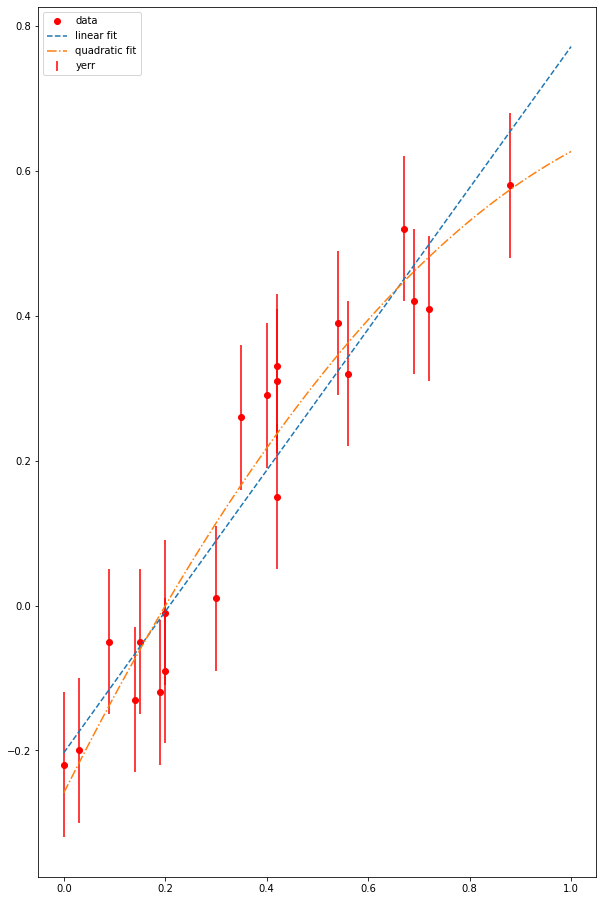

In [9]:
#Plotting the data and the fits


trange = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,16))
plt.scatter(x, y, label='data', c='r')
plt.errorbar(x, y, yerr=sigma_y, fmt='none', label='yerr', c='r')
plt.plot(trange, linear(trange, *linearfit_param[0]), label='linear fit', ls = '--')
plt.plot(trange, quadratic(trange, *quadraticfit_param[0]), label='quadratic fit', ls = '-.')
plt.legend()
plt.show()

4. 
• Calculate the significance in terms of no of sigmas of the Higgs boson
discovery claim from the p value given in the abstract of the ATLAS
discovery paper, arXiv:1207.7214.

• Do the same for the LIGO discovery of GW150914, for which the p
value = 2 × 10−7

. (Hint : look up norm.isf)

• From the Super-K discovery paper for neutrino oscillations (hep-
ex/9807003), calculate the χ2 GOF using the best-fit νμ ↔ ντ oscillation solution. (Hint : check page 4 of the paper, second column,last paragraph) [10 pts]

In [14]:
print(f'Significance of Higgs Boson discovery claim with p value of 1.7e-9 is: {st.norm.isf(1.7e-9)}')

Significance of Higgs Boson discovery claim with p value of 1.7e-9 is: 5.911017938341624


In [13]:
print(f'Significance of LIGO discovery of GW150914 with p value of 2e-7 is := {st.norm.isf(2e-7)}')

Significance of LIGO discovery of GW150914 with p value of 2e-7 is := 5.068957749717791


In [18]:
print(f'chi2 GOF of Super-K discovery of neutrino oscillations = {st.chi2(67).sf(65.2)}')

chi2 GOF of Super-K discovery of neutrino oscillations = 0.5394901931099036
